In [14]:
import equinox as eqx 
import jax 
import jax.numpy as jnp
from typing import List
import matplotlib.pyplot as plt

In [3]:
ALPHABET = 'abcdefghijklmnopqrstuvwxyz'
SPECIAL = ['<S>', '<E>']

# helper functions 
def most_freq(dct): 
  return sorted(dct.items(), key=lambda kv: -kv[1])

def unique(s: str): 
  match s:
    case str():
      return sorted(list(set(s)))
    case list():
      return unique(''.join(s))
    case _:
      raise ValueError(f"unsupported type {type(s)}")

In [4]:
words = open('../names.txt', 'r').read().splitlines()
words2 = [line for line in open('../nietzsche_cleaned.txt', 'r', encoding='utf-8').read().splitlines() if line.strip()]
words3 = [line for line in open('../shakespeare.txt', 'r', encoding='utf-8').read().splitlines() if line.strip()]

In [5]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [6]:
len(words)

32033

In [7]:
min(len(w) for w in words)

2

In [66]:
max(len(w) for w in words)

15

In [8]:
N = jnp.zeros((len(ALPHABET) + len(SPECIAL), len(ALPHABET) + len(SPECIAL)), dtype=jnp.int32) # N.shape = (28, 28)

In [10]:
chars = unique(words)
stoi = {s: i for i, s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [11]:
for w in words:
  cs = ['<S>'] + list(w) + ['<E>']
  for c1, c2 in zip(cs, cs[1:]):
    ix1 = stoi[c1]
    ix2 = stoi[c2]
    # print(f"{c1} -> {ix1}, {c2} -> {ix2}")
    N = N.at[ix1, ix2].add(1) # N[ix1, ix2] += 1

In [13]:
N

Array([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568,
        2528, 1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,
         161,  182, 2050,  435,    0, 6640],
       [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,
         103,    0,    4,  105,    0,    0,  842,    8,    2,   45,    0,
           0,    0,   83,    0,    0,  114],
       [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,
         116,    0,    0,  380,    1,   11,   76,    5,   35,   35,    0,
           0,    3,  104,    4,    0,   97],
       [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,
          60,   30,   31,  378,    0,    1,  424,   29,    4,   92,   17,
          23,    0,  317,    1,    0,  516],
       [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178,
        3248,  769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,
          50,  132, 1070,  181,    0, 3983],
       [ 242,    0,    0,    0,  12

In [17]:
itos = {i: s for s, i in stoi.items()}

In [41]:
N[0, 0].item()

556

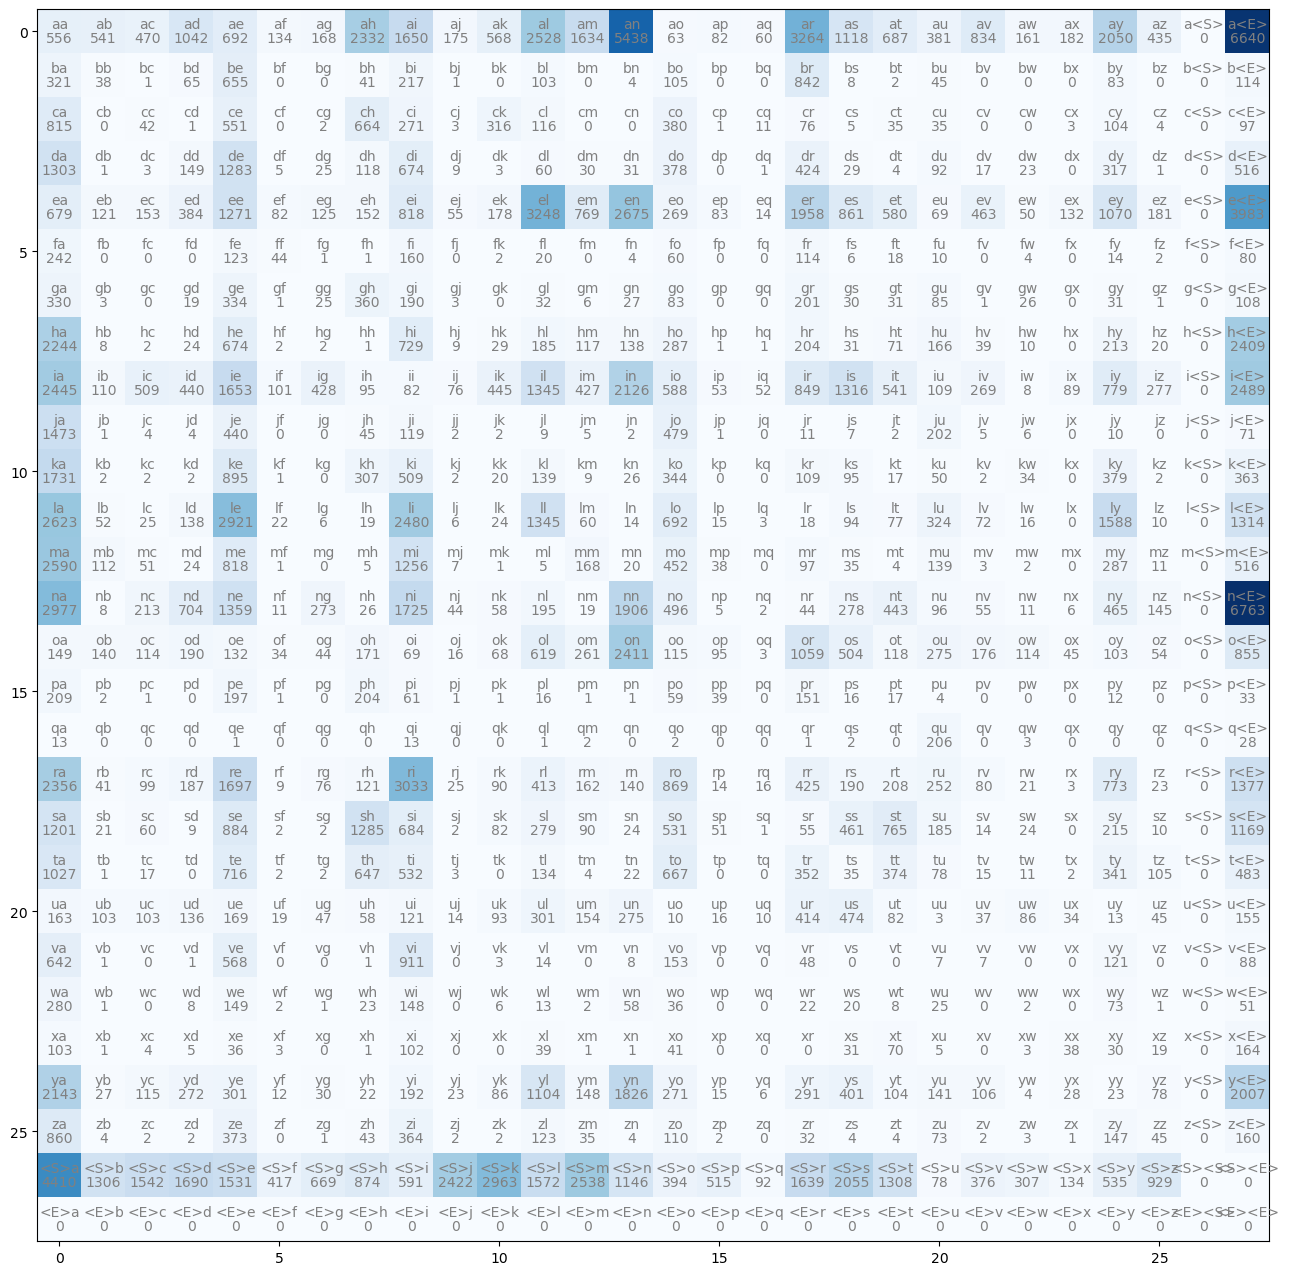

In [43]:
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(N.shape[0]):
  for j in range(N.shape[1]):
    chstr = itos[i] + itos[j]
    plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
    # print(f"{itos[i]}, {itos[j]}: {chstr}")
    # print(f"{chstr}: {N[i, j]}")